<a href="https://colab.research.google.com/github/emanamoura/machine-learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas básicas

In [9]:
!pip install plotly --upgrade

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploração dos dados

In [12]:
base_credit = pd.read_csv('/content/drive/MyDrive/credit_data.csv')

In [13]:
base_credit # defaulted

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [14]:
base_credit.head(10)

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1
5         6  24904.064140  57.471607    15.498598        0
6         7  48430.359613  26.809132  5722.581981        0
7         8  24500.141984  32.897548  2971.003310        1
8         9  40654.892537  55.496853  4755.825280        0
9        10  25075.872771  39.776378  1409.230371        0

In [15]:
base_credit.tail(8)

clientid        income        age         loan  default
1992      1993  30803.806165  23.250084   623.024153        0
1993      1994  54421.410155  26.821928  3273.631823        0
1994      1995  24254.700791  37.751622  2225.284643        0
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

In [16]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [17]:
base_credit[base_credit['income'] >= 69995.685578]

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [18]:
base_credit[base_credit['loan'] <= 1.377630]

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

### Visualização dos dados

In [19]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

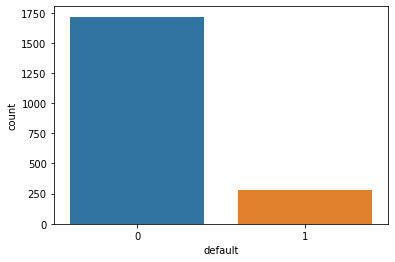

In [20]:
sns.countplot(x = base_credit['default']);

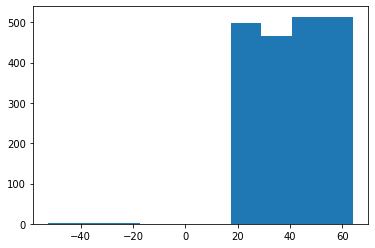

In [21]:
plt.hist(x = base_credit['age']);

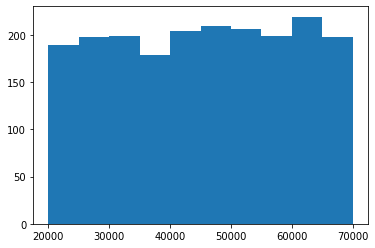

In [22]:
plt.hist(x = base_credit['income']);

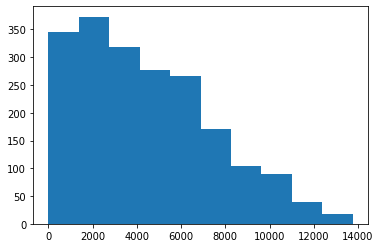

In [23]:
plt.hist(x = base_credit['loan']);

In [24]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

### Tratamento de valores inconsistentes

In [25]:
base_credit.loc[base_credit['age'] < 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [26]:
base_credit[base_credit['age'] < 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [27]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

clientid        income         loan  default
0            1  66155.925095  8106.532131        0
1            2  34415.153966  6564.745018        0
2            3  57317.170063  8020.953296        0
3            4  42709.534201  6103.642260        0
4            5  66952.688845  8770.099235        1
...        ...           ...          ...      ...
1995      1996  59221.044874  1926.729397        0
1996      1997  69516.127573  3503.176156        0
1997      1998  44311.449262  5522.786693        1
1998      1999  43756.056605  1622.722598        0
1999      2000  69436.579552  7378.833599        0

[2000 rows x 4 columns]

In [28]:
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [29]:
base_credit[base_credit['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [30]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [31]:
base_credit3.loc[base_credit3['age'] < 0]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [32]:
# Preencher os valores inconsistente manualmente

In [33]:
# Prencher a média

In [34]:
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [35]:
base_credit['age'].mean()

40.80755937840458

In [36]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [37]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [38]:
base_credit.loc[base_credit['age'] < 0]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [39]:
base_credit.head(27)

clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  40.920000  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  40.920000  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0
26        27  63287.038908  40.920000  9595.286289        0

### Tratamento de valores faltantes

In [40]:
base_credit.isnull()

clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [41]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [42]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [43]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [44]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [45]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [46]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

### Divisão entre previsores e classe

In [47]:
type(base_credit)

pandas.core.frame.DataFrame

In [48]:
X_credit = base_credit.iloc[:, 1:4].values

In [49]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [50]:
type(X_credit)

numpy.ndarray

In [51]:
y_credit = base_credit.iloc[:, 4].values

In [52]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
type(y_credit)

numpy.ndarray

### Escalonamento dos valores

In [54]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [55]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [56]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(69995.6855783239, 63.97179584112021, 13766.051239333701)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [58]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [59]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7220222385319197, 1.7393673928651971, 3.0616609141708273)

In [60]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [62]:
base_census = pd.read_csv('/content/drive/MyDrive/census.csv')

In [63]:
base_census

age          workclass  ...  native-country  income
0       39          State-gov  ...   United-States   <=50K
1       50   Self-emp-not-inc  ...   United-States   <=50K
2       38            Private  ...   United-States   <=50K
3       53            Private  ...   United-States   <=50K
4       28            Private  ...            Cuba   <=50K
...    ...                ...  ...             ...     ...
32556   27            Private  ...   United-States   <=50K
32557   40            Private  ...   United-States    >50K
32558   58            Private  ...   United-States   <=50K
32559   22            Private  ...   United-States   <=50K
32560   52       Self-emp-inc  ...   United-States    >50K

[32561 rows x 15 columns]

In [64]:
base_census.describe()

age  final-weight  ...  capital-loos  hour-per-week
count  32561.000000  3.256100e+04  ...  32561.000000   32561.000000
mean      38.581647  1.897784e+05  ...     87.303830      40.437456
std       13.640433  1.055500e+05  ...    402.960219      12.347429
min       17.000000  1.228500e+04  ...      0.000000       1.000000
25%       28.000000  1.178270e+05  ...      0.000000      40.000000
50%       37.000000  1.783560e+05  ...      0.000000      40.000000
75%       48.000000  2.370510e+05  ...      0.000000      45.000000
max       90.000000  1.484705e+06  ...   4356.000000      99.000000

[8 rows x 6 columns]

In [65]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualização dos dados

In [66]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

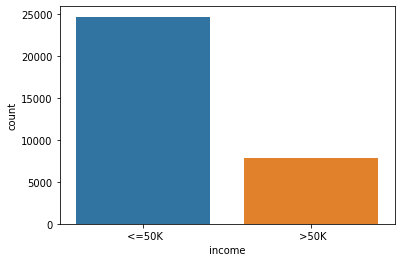

In [67]:
sns.countplot(x = base_census['income']);

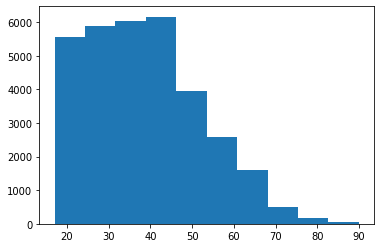

In [68]:
plt.hist(x = base_census['age']);

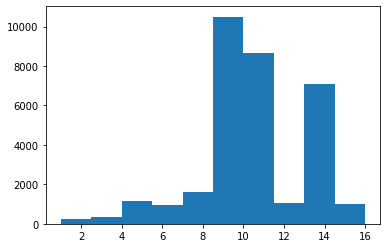

In [69]:
plt.hist(x = base_census['education-num']);

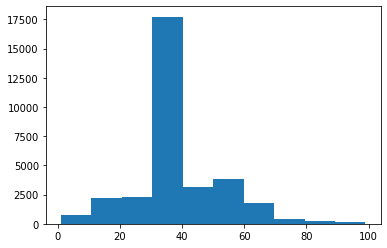

In [70]:
plt.hist(x = base_census['hour-per-week']);

In [71]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [72]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [73]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [74]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [75]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe

In [76]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [77]:
X_census = base_census.iloc[:, 0:14].values

In [78]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [79]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [80]:
y_census = base_census.iloc[:, 14].values

In [81]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento de atributos categóricos

### LabelEncoder

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
label_encoder_teste = LabelEncoder()

In [84]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [85]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [86]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [87]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [88]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [89]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [90]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [91]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### OneHotEncoder

In [92]:
# Carro

# Gol Pálio Uno
#   1     2   3

# Gol   1 0 0
# Pálio 0 1 0
# Uno   0 0 1 # encode

In [93]:
len(np.unique(base_census['workclass'])) # 1 0 0 0 0 0 0 0, 0 0 0 0 1 0 0 0 0

9

In [94]:
len(np.unique(base_census['occupation']))

15

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [96]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [97]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [98]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [99]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [100]:
X_census.shape

(32561, 108)

## Escalonamento dos valores

In [101]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [102]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases em treinamento e teste

In [103]:
from sklearn.model_selection import train_test_split

## Credit data

In [104]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [105]:
X_credit_treinamento.shape

(1500, 3)

In [106]:
y_credit_treinamento.shape

(1500,)

In [107]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

## Census

In [108]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [109]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [110]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

## Salvar as variáveis

In [111]:
import pickle

In [112]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [113]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# Naïve Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

## Base risco de crédito

In [116]:
base_risco_credito = pd.read_csv('/content/drive/MyDrive/risco_credito.csv')

In [117]:
base_risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [118]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [119]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [120]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [121]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [122]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [123]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [124]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [125]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [126]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [127]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [128]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [129]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base credit data - 93.80%

In [130]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [131]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [132]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [133]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [134]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [135]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [136]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [138]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [139]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [140]:
from yellowbrick.classifier import ConfusionMatrix

0.938

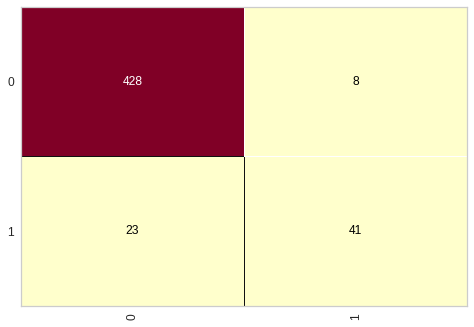

In [141]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [142]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base census - 47.67%

In [143]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [144]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [145]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [146]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [147]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [148]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

0.4767656090071648

In [149]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

0.4767656090071648

In [150]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Árvores de decisão

In [151]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito

In [152]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [153]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [154]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [155]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [156]:
arvore_risco_credito.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [157]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

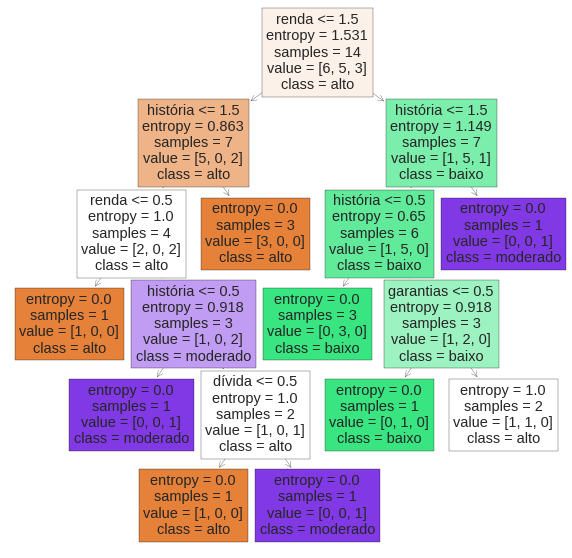

In [158]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [159]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base credit data - 98.20%

In [160]:
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [161]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [162]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [163]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [164]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [166]:
from sklearn.metrics import accuracy_score, classification_report

In [167]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

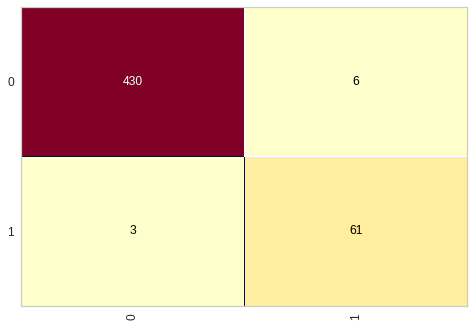

In [168]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [169]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [170]:
arvore_credit.classes_

array([0, 1])

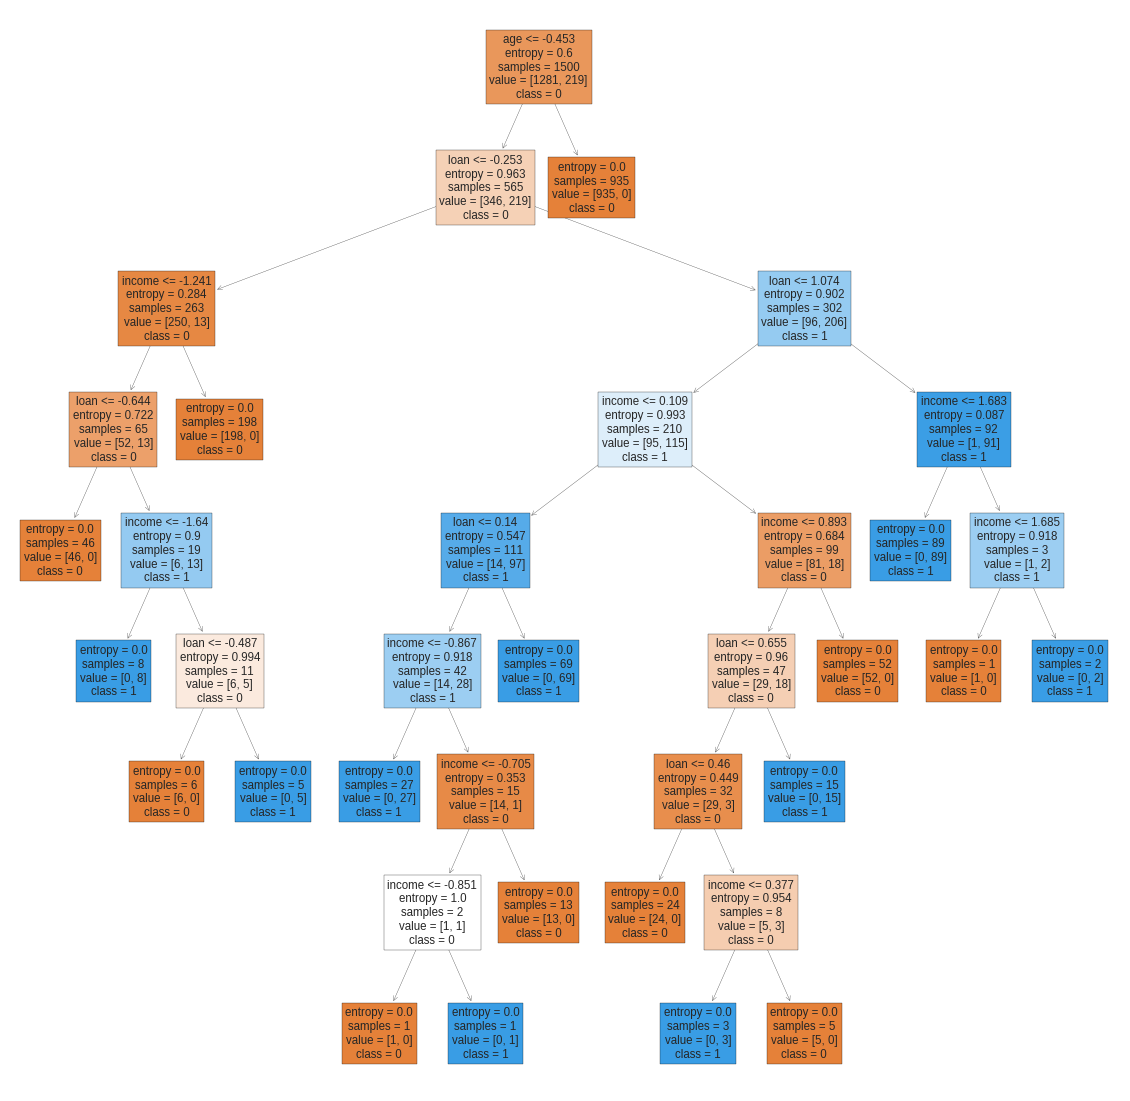

In [171]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census - 81.04%

In [172]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [173]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [174]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [175]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [176]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [177]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [178]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

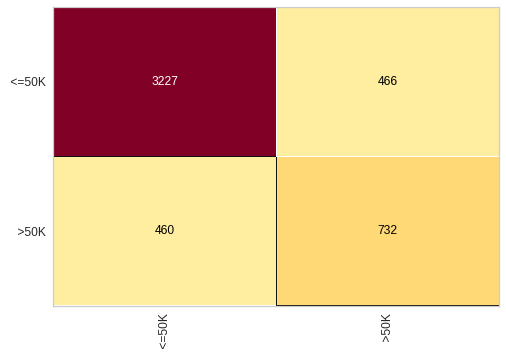

In [179]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [180]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

## Base credit data - 98.40%

In [182]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [183]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [184]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [185]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [186]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [187]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [188]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

In [189]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

0.984

In [190]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



## Base census - 85.07%

In [191]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [192]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [193]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [194]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [195]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [196]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [197]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [198]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

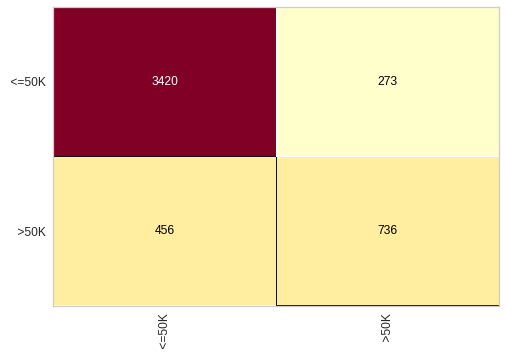

In [199]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [200]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# Regras

In [201]:
!pip install Orange3

     |████████████████████████████████| 28.6 MB 1.5 MB/s 
     |████████████████████████████████| 252 kB 54.4 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 149 kB 55.2 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 8.3 MB 35.7 MB/s 
     |████████████████████████████████| 992 kB 45.6 MB/s 
     |████████████████████████████████| 491 kB 58.0 MB/s 
     |████████████████████████████████| 2.4 MB 41.5 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 228 kB 53.2 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 
     |████████████████████████████████| 317 kB 61.5 MB/s 
     |████████████████████

In [202]:
import Orange

## Base risco de crédito

In [205]:
base_risco_credito = Orange.data.Table('/content/drive/MyDrive/risco_credito_regras.csv')

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



In [206]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [207]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [208]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [209]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [210]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0])

In [211]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [212]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


## Base credit data - 97.40%

In [216]:
base_credit = Orange.data.Table('/content/drive/MyDrive/credit_data_regras.csv')

In [217]:
base_credit.domain

[income, age, loan | default]

In [218]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [219]:
base_dividida

([[23812.3, 42.7656, 2716.66 | 0],
  [57575, 33.8001, 9857.23 | 1],
  [58695.1, 29.7744, 1826.52 | 0],
  [45446.5, 19.3047, 8474.98 | 1],
  [43378.2, 60.8483, 3277.74 | 0],
  ...
 ], [[24061.5, 34.5115, 3980.58 | 1],
  [25671.7, 18.7465, 2272.15 | 0],
  [29190.3, 60.2912, 5239.59 | 0],
  [23086.3, 24.85, 1256.4 | 0],
  [66768.4, 49.1309, 4255.37 | 0],
  ...
 ])

In [220]:
base_dividida[0]

[[23812.3, 42.7656, 2716.66 | 0],
 [57575, 33.8001, 9857.23 | 1],
 [58695.1, 29.7744, 1826.52 | 0],
 [45446.5, 19.3047, 8474.98 | 1],
 [43378.2, 60.8483, 3277.74 | 0],
 ...
]

In [221]:
base_dividida[1]

[[24061.5, 34.5115, 3980.58 | 1],
 [25671.7, 18.7465, 2272.15 | 0],
 [29190.3, 60.2912, 5239.59 | 0],
 [23086.3, 24.85, 1256.4 | 0],
 [66768.4, 49.1309, 4255.37 | 0],
 ...
]

In [222]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [223]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [224]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [225]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9966813726351 THEN default=0 
IF loan<=2507.64970973955 AND income>=20145.9885970689 THEN default=0 
IF loan>=7708.31562497011 AND age>=18.3097456344403 THEN default=1 
IF income>=58132.4712652713 THEN default=0 
IF loan>=5836.56338145928 AND age>=23.5900381784886 THEN default=1 
IF income>=46911.197102163 AND age>=21.8403608766384 THEN default=0 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF age>=34.7410444347188 THEN default=0 
IF age>=34.669146894011604 THEN default=1 
IF age>=34.1016539284028 THEN default=0 
IF age>=33.6895613595843 THEN default=1 
IF age>=33.4312054850161 THEN default=0 
IF age>=32.8975483207032 THEN default=1 
IF income<=26617.0303151011 AND loan>=2940.4239697461103 THEN default=1 
IF age>=30.676849837880603 AND loan>=5532.3438431879 THEN default=1 
IF age>=30.676849837880603 THEN default=0 
IF age>=30.132575557101497 THEN default=1 
IF age>=28.354908418376002 AND income>=26617.0303151011 THEN default=0 
IF age>=27.873486188

In [226]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [227]:
previsoes

In [228]:
Orange.evaluation.CA(previsoes)

array([0.966])

## Base census - 78.90% (executado na interface gráfica do Orange)

In [229]:
print("CONTINUAAAA")

CONTINUAAAA
